## Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Datasets

In [2]:
cust = pd.read_csv('C:/Users/Nithin/Downloads/Python Foundation Case Study 2 - Credit Card Case Study/Customer Acqusition.csv')
repay = pd.read_csv('C:/Users/Nithin/Downloads/Python Foundation Case Study 2 - Credit Card Case Study/Repayment.csv')
spend = pd.read_csv('C:/Users/Nithin/Downloads/Python Foundation Case Study 2 - Credit Card Case Study/spend.csv')

In [3]:
cust_final = pd.merge(left=cust,right=repay,how='inner',left_on='Customer',right_on='Customer')
cust_final = pd.merge(left=cust_final,right=spend,how='inner',left_on='Customer',right_on='Customer')

In [4]:
#Data Prep
cust_final.drop(['No','SL No:','Sl No:','Unnamed: 4'],axis=1,inplace=True)
cust_final.rename(columns={'Month_x':'Repay_mnth','Amount_x':'Repay_amt','Month_y':'Spend_mnth','Amount_y':'Spend_amt'},inplace=True)
cust_final.Repay_mnth = pd.to_datetime(cust_final['Repay_mnth'])
cust_final.Spend_mnth = pd.to_datetime(cust_final['Spend_mnth'])

### 1.	In the above dataset,
##### a.	Incase age is less than 18, replace it with mean of age values.
##### b.	Incase spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)
##### c.	Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [5]:
#a.
cust_final.Age = np.where(cust_final.Age < 18, cust_final.Age.mean(), cust_final.Age)

In [6]:
#b.
cust_final.Spend_amt = np.where(cust_final.Spend_amt > cust_final.Limit, cust_final.Limit * 0.5 ,cust_final.Spend_amt)

In [7]:
#c.
cust_final.Repay_amt = np.where(cust_final.Repay_amt > cust_final.Limit, cust_final.Limit ,cust_final.Repay_amt)

### 2. From the above dataset create the following summaries:
##### a.	How many distinct customers exist?
##### b.	How many distinct categories exist?
##### c.	What is the average monthly spend by customers?
##### d.	What is the average monthly repayment by customers?
##### e.	If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)
##### f.	What are the top 5 product types?
##### g.	Which city is having maximum spend?
##### h.	Which age group is spending more money?
##### i.	Who are the top 10 customers in terms of repayment?


In [8]:
#a.
cust_final.Customer.nunique()

100

In [9]:
#b.
cust_final.Product.nunique()

3

In [11]:
df = cust_final
df['spnd_mn'] = df.Spend_mnth.dt.month
df['Rep_mn'] = df.Repay_mnth.dt.month

In [12]:
#c.
df.groupby(['Customer','spnd_mn']).Spend_amt.sum()

Customer  spnd_mn
A1        1          46968085.98
          2          15771212.10
          4           9419373.00
          5           6500543.58
          8           6198697.80
                        ...     
A95       1            240401.50
A96       1             54729.66
A97       1              5000.00
A98       1              5000.50
A99       1              5001.00
Name: Spend_amt, Length: 578, dtype: float64

In [13]:
#d.
df.groupby(['Customer','Rep_mn']).Repay_amt.sum()

Customer  Rep_mn
A1        1         43340513.22
          2         14073728.40
          4          9161084.88
          7          5349181.32
          9          3355695.00
                       ...     
A95       1           369405.96
A96       1           100000.00
A97       1            10000.00
A98       1            10001.00
A99       1            10002.00
Name: Repay_amt, Length: 558, dtype: float64

In [14]:
df['Profit'] = df.Repay_amt - df.Spend_amt
df['Profit'] = np.where(df.Profit < 0,0,df.Profit)

In [15]:
#e.
df.groupby('Rep_mn').Profit.sum()*0.029

Rep_mn
1     1.380969e+07
2     9.986722e+06
3     8.321058e+06
4     7.285015e+06
5     1.468164e+07
6     1.466216e+06
7     2.202395e+06
8     2.027576e+06
9     1.440414e+06
10    1.083109e+06
11    3.414323e+06
12    1.319981e+06
Name: Profit, dtype: float64

In [29]:
#f
df.groupby('Type').Spend_amt.sum().sort_values(ascending=False).head(5)

Type
CAMERA          7.517011e+08
PETRO           7.071549e+08
FOOD            5.478835e+08
AIR TICKET      5.401180e+08
TRAIN TICKET    5.344239e+08
Name: Spend_amt, dtype: float64

In [28]:
#g.
df.groupby('City').Spend_amt.sum().sort_values(ascending=False).head(1)

City
COCHIN    1.175903e+09
Name: Spend_amt, dtype: float64

In [32]:
#h.
df.groupby('Age').Spend_amt.sum().sort_values(ascending=False).head(3)

Age
28.00000    6.154699e+08
43.24941    4.596122e+08
44.00000    3.420884e+08
Name: Spend_amt, dtype: float64

In [34]:
#i.
df.groupby('Customer').Repay_amt.sum().sort_values(ascending=False).head(10)

Customer
A61    4.004874e+08
A60    3.752990e+08
A13    2.967320e+08
A43    2.631860e+08
A45    2.618984e+08
A12    2.583776e+08
A14    2.462413e+08
A44    2.400866e+08
A39    2.362970e+08
A42    2.360793e+08
Name: Repay_amt, dtype: float64

### 3.	Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [36]:
df2 = cust_final
df2['Yr'] = df2.Spend_mnth.dt.year
cit_wise = pd.pivot_table(df2,index='City',columns=['Product','Yr'],values= 'Spend_amt',aggfunc='sum')

<AxesSubplot:xlabel='City'>

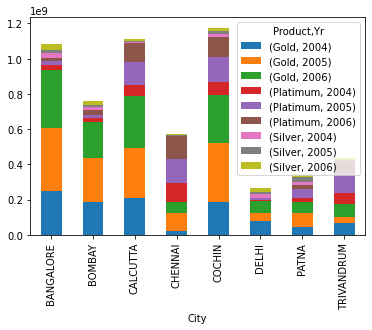

In [68]:
cit_wise.plot(kind = 'bar',stacked = True)

### 4.	Create graphs for
##### a.	Monthly comparison of total spends, city wise
##### b.	Comparison of yearly spend on air tickets
##### c.	Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

<AxesSubplot:ylabel='City'>

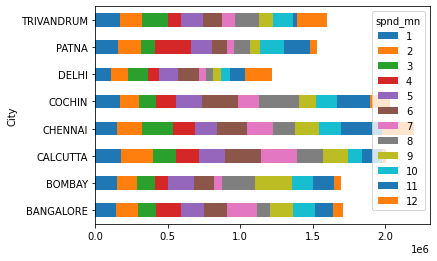

In [73]:
#a.
pd.pivot_table(cust_final,index='City',columns='spnd_mn', values = 'Spend_amt').plot(kind = 'barh',stacked = True)

<AxesSubplot:xlabel='Yr'>

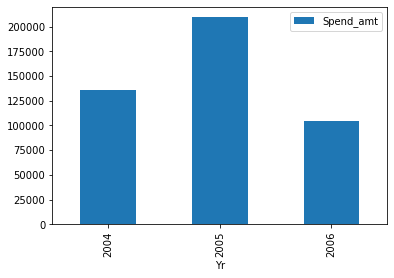

In [79]:
#b.
pd.pivot_table(cust_final[cust_final.Type == 'AIR TICKET'],values='Spend_amt',index= 'Yr' ).plot(kind='bar')

<AxesSubplot:xlabel='spnd_mn'>

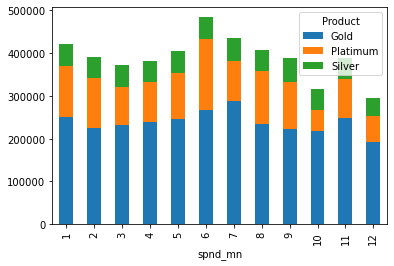

In [84]:
#c.
pd.pivot_table(cust_final,index='spnd_mn',columns='Product', values = 'Spend_amt').plot(kind = 'bar',stacked = True)

### 5.	Write user defined PYTHON function to perform the following analysis:
##### You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.


In [95]:
cust_final['Rep_Yr'] = cust_final.Repay_mnth.dt.year

In [106]:
prod = input('Enter product category in Gold/Silver/Platinum: ')
tim = input('Enter time period in yearly/monthly: ')

Enter product category in Gold/Silver/Platinum: Gold
Enter time period in yearly/monthly: monthly


In [103]:
def Top10_cust (prod,tim):
    if tim == 'monthly':
        out = cust_final[cust_final.Product == prod].groupby(['Customer','City','Product','Rep_mn']).Repay_amt.sum().sort_values(ascending = False)
    else :
        out = cust_final[cust_final.Product == prod].groupby(['Customer','City','Product','Rep_Yr']).Repay_amt.sum().sort_values(ascending = False)
    return out

In [109]:
Top10_cust (prod,tim)

Customer  City       Product  Rep_mn
A61       COCHIN     Gold     4         1.296887e+08
A42       BOMBAY     Gold     5         1.024656e+08
A60       CALCUTTA   Gold     1         9.369222e+07
                              4         9.110750e+07
A30       BANGALORE  Gold     5         8.333683e+07
                                            ...     
A88       BANGALORE  Gold     3         1.468213e+05
A67       CHENNAI    Gold     1         1.356912e+05
A42       BOMBAY     Gold     9         1.220721e+05
A67       CHENNAI    Gold     5         1.112775e+05
A90       COCHIN     Gold     4         1.099313e+05
Name: Repay_amt, Length: 211, dtype: float64